In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import module.conf as conf
import sklearn.metrics  as metrics

from sklearn.preprocessing import MinMaxScaler

# matplotlib.use("QtCairo")
# %matplotlib tk

### Implement

1. Sigmoid: $y = f(x) = {1\over 1 + e^{-x}}$

In [3]:
def sigmoid(s: float) -> np.ndarray:
    return 1/(1 + np.exp(-s))

2. Gradient of Sigmoid: 
- $z_i = f(w^Tx_i+b_i) $
- $f(z_i)= sigmoid(w^Tx_i+b_i)$
- $P(y|X;w,b) = \prod\limits_{i=1}^{N}P(y_i | x_i; w, b) = \prod\limits_{i=1}^{N}z_{i}^{y_i}(1-z_{i})^{1-y_i}$
- $J(w,b) = -logP(y|X;w,b) = - \sum\limits_{i=1}^{N}(y_ilogz_i + (1-y_i)log(1-z_i))$
- $ w_i = w_{i-1} - \eta (z_i - y_i) x_i $

In [10]:
def grad_sigmoid(w: np.ndarray, b: float, X: np.ndarray, y: np.ndarray , lambda_:float = 1.):
    m, n = X.shape
    grad_w = np.zeros(shape=w.shape)
    grad_b = .0
    for i in range(m):
        zi = np.dot(w, X[i]) + b
        f = sigmoid(zi)
        delta_f_y = f - y[i]
        for j in range(n):
            grad_w[j] += delta_f_y * X[i, j]
            pass
        grad_b += delta_f_y
        pass
    for i in range(n):
        grad_w[i] += lambda_ * w[i]

    grad_w /= m
    grad_b /= m

    return grad_w, grad_b

# grad_sigmoid(w=np.asarray([0,0,0]), b=0, X=np.asarray([[1, 2, 3], [4, 5, 6]]), y=np.asarray([0, 1]))

In [11]:
def calc_grad_descent(X: np.ndarray, y_train: np.ndarray, w_0: np.ndarray, b_0: float, alpha: float, iter=1_000, stop_criteria:float = 1e-3):
    w = [w_0]
    b = [b_0]
    m, n = X.shape
    for _ in range(iter):
        grad_w, grad_b = grad_sigmoid(w[-1], b[-1], X, y_train)
        w_new = w[-1] - alpha * grad_w
        b_new = b[-1] - alpha * grad_b
        w.append(w_new)
        b.append(b_new)
        if np.linalg.norm(grad_w) < stop_criteria:
            break
        pass
    return w, b

### Create data

In [74]:
X = []
Y = []
N = 500
dimension = 10
# for i in range(N//2):
#     X.append(np.random.uniform(low=0, high=4.5, size=dimension))
#     Y.append(0)
#     pass
# for i in range(N - N//2):
#     X.append(np.random.uniform(low=5.5, high=10, size=dimension))
#     Y.append(1)
#     pass
# X = np.asarray(X)
# Y = np.asarray(Y)
# w_init = np.random.randn(1, dimension)
# b_init: float = np.random.rand(1)
# max_0 = X[:, 0].max()
# w_init = X[np.any(X == max_0, axis=1)][-1]
# b_init = np.ceil(max_0)
# print(f"w:{w_init}\nb:{b_init}")
# np.save(file=conf.PROJECT_DIR + "/data/ml/X", arr=X)
# np.save(file=conf.PROJECT_DIR + "/data/ml/Y", arr=Y)
# np.save(file=conf.PROJECT_DIR + "/data/ml/w_init", arr=w_init)
# np.save(file="".join((conf.PROJECT_DIR, "/data/ml/b_init",)), arr=b_init)
X: np.ndarray = np.load(file="".join((conf.PROJECT_DIR, "/data/ml/X.npy",)))
Y: np.ndarray = np.load(file="".join((conf.PROJECT_DIR, "/data/ml/Y.npy",)))
# w_init: np.ndarray = np.load(file="".join((conf.PROJECT_DIR, "/data/ml/w_init.npy",)))
# b_init: np.ndarray = np.load(file="".join((conf.PROJECT_DIR, "/data/ml/b_init.npy",)))
scaler = MinMaxScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)
print(f"{X}")
# w_init = np.random.randn(dimension)
w_init = X[0]
b_init = np.random.rand()
# print(f"X:{X}\nY:{Y}")
print(f"w_init:{w_init}\nb_init:{(b_init)}")

alpha = 1e-3
# column matrix w_init
w_list, b_list = calc_grad_descent(X=X, y_train=Y, w_0=w_init, b_0=b_init, alpha=alpha, iter=10_000, stop_criteria=alpha)
print(f"w_list[-1]:{w_list[-1]}\nb_list[-1]:{b_list[-1]} after {len(w_init)-1} rounds")

[[0.1190577  0.11909346 0.35921148 ... 0.42143163 0.05605596 0.31083064]
 [0.41946628 0.29551103 0.33622082 ... 0.36493898 0.06238668 0.33681605]
 [0.12060993 0.2032742  0.28010393 ... 0.38096215 0.20666375 0.36529537]
 ...
 [0.8707725  0.92150225 0.81993501 ... 0.69256901 0.64501942 0.8464256 ]
 [0.63120782 0.65628484 0.74559976 ... 0.63506109 0.58407302 0.77810916]
 [0.84709824 0.65954266 0.98482699 ... 0.81576125 0.76402346 0.77799936]]
w_init:[0.1190577  0.11909346 0.35921148 0.35671153 0.1660203  0.33961511
 0.41708571 0.42143163 0.05605596 0.31083064]
b_init:0.44300949373344733
w_list[-1]:[0.29593439 0.2111857  0.47477226 0.47167261 0.2553764  0.41014304
 0.4594747  0.48752453 0.19134119 0.38870052]
b_list[-1]:-1.2475968086015878 after 9 rounds


### Test

In [77]:
# sigmoid(np.dot(w_list[-1], X[0,0]) + b_list[-1])
# sigmoid(np.add(np.dot(w_list[-1], X[0]), b_list[-1]))
# sigmoid(np.dot(w_list[-1], X[0]))
# sigmoid(np.add(np.dot(w_list[-1], X[:, 0]), b_list[-1]))
# metrics.f1_score(y_true=Y, y_pred=sigmoid(np.add(np.dot(w_list[-1], X[:, 0]), b_list[-1])))
S: np.ndarray = sigmoid(np.dot(w_list[-1], X.T) + b_list[-1])
# print(f"S:{S}")
# MAE
print(f"MAE:{metrics.mean_absolute_error(y_true=Y, y_pred=S)}")
print(f"APS:{metrics.average_precision_score(y_true=Y, y_score=S)}")
# print(f"CLR:{metrics.class_likelihood_ratios(y_true=Y, y_pred=np.round(S))}")
# Accurary Score:
print(f"Accuracy:{metrics.accuracy_score(y_true=Y.astype(dtype=float), y_pred=np.round(a=S, decimals=0), normalize=True)}")
# F1 Score
print(f"F1 score:{metrics.f1_score(y_true=Y.astype(dtype=float), y_pred=np.round(S))}")

MAE:0.2821866374382717
APS:1.0
Accuracy:0.998
F1 score:0.998003992015968


### Plotting

[4.2157885  5.90758189 2.62777949 2.64504825 4.88532547 3.04185782
 2.7152677  2.55904416 6.52027314 3.20966078]


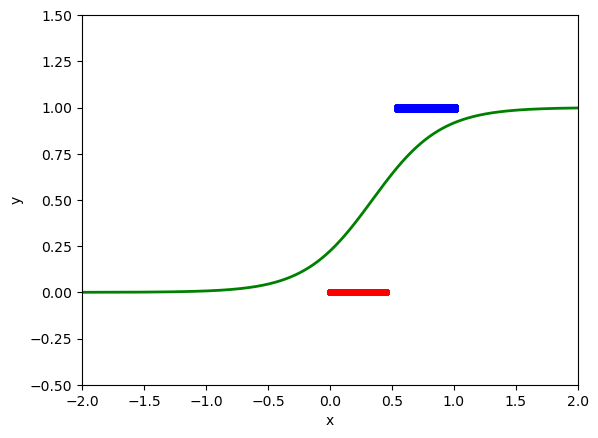

In [81]:
# dth = 0

X0 = X[np.where(Y == 0)]
Y0 = Y[np.where(Y == 0)]
X1 = X[np.where(Y == 1)]
Y1 = Y[np.where(Y == 1)]
# print(f"{X0.shape}")

xx = np.linspace(-2, 2, 10_000)
xx = np.asarray([xx, xx, xx, xx, xx, xx, xx, xx, xx, xx])
b = b_list[-1]
w = w_list[-1]
# print(f"b:{b} w:{w} -b/w:{-b/w}")
threshold = -b/w

yy = sigmoid(np.add(b, np.dot(w, xx)))

fig, axe = plt.subplots()
axe.plot(X0, Y0, "ro", markersize=4)
axe.plot(X1, Y1, "bs", markersize=4)

axe.axis([-2, 2, -0.5, 1.5])
print(f"{threshold}")
axe.plot(xx.transpose()[:, 0], yy, 'g-', linewidth = 2)
# axe.plot(threshold, [.5], 'y^', markersize = 8)
# axe.xlabel('studying hours')
# axe.ylabel('predicted probability of pass')
axe.set_xlabel("x")
axe.set_ylabel('y')
plt.show()

### Test matrix

In [ ]:
x = np.array(object=[1, 2, 3], dtype=float)
y = np.array(object=[4], dtype=float)

print(f"x*y = {x*y}")
# print(f"x dot y = {np.dot(a=x, b=y)}")
print(f"x - 2 = {x-2}")